# Randomization Methods for a Difference in Means

In [1]:
import pandas as pd
import seaborn as sns
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random
from typing import Callable
from collections.abc import Iterable

## Input Data

In [2]:
g1 = [9.17, 6.94, 4.99, 1.71, 5.43, 10.26, 4.67, 11.67, 7.15, 5.33] # with Light at night
g2 = [2.83, 4.6, 6.52, 2.27, 5.95, 4.21, 4.0, 2.53]

In [3]:
N_SAMPLES = 5000
N_TRIALS = 10

In [4]:
def add_text(ax, t, xy):
    ax = ax.annotate(t, xy=xy, xycoords='data',
        xytext=(30, 0), textcoords='offset points')

def plot_hist(diffs, avg, se, bins = None):

    if bins is None:
        bins = np.arange(-4, 4, 0.2)
        
    fig, ax = plt.subplots(figsize =(8,6))
    ax = sns.histplot(x = diffs, bins = bins, ax = ax)

    ax.axvline(x=avg, linewidth=3, color='firebrick', linestyle = 'dashed')
    add_text(ax, f'Mean: {avg:.4f}, SE = {se:.4f}', (avg+0.5, 300))
    return ax

In [5]:
def get_randomization_dist(
    g1: list, g2:list, sampling_func: Callable, n_trials: int, n_samples: int):
    """
    Creates `n_trials` randomization distributions (RD) for a difference in
    means using an input sampling function and returns the RD corresponding to
    the median standard error.
    """
    rd_centers, rd_se, diff_means = [], [], []
    
    for _ in range(n_trials):

        diffs_i = [] # container for current trial
        for _ in range(n_samples):
            g_1, g_2 = sampling_func(g1, g2)
            diffs_i.append(calc_diff(g_1, g_2))

        diff_means.append(diffs_i)    
        rd_centers.append(sum(diffs_i) / len(diffs_i))
        rd_se.append(np.std(diffs_i, ddof = 1))

    i = (rd_se == np.sort(rd_se)[len(rd_se)//2]).argmax() # get index of median
   
    return diff_means[i], rd_centers[i], rd_se[i]

def calc_diff(g1: Iterable, g2: Iterable) -> float:
    return np.mean(g1) - np.mean(g2)

## Reallocate Groups

#### Using `random.sample`

In [6]:
def reallocate_groups(g1: Iterable, g2: Iterable) -> tuple:
    pool = np.array(g1 + g2)
    g1_idx = random.sample(range(len(pool)), k = len(g1))
    g2_idx = list(set(range(len(pool))).difference(g1_idx))
    return pool[g1_idx], pool[g2_idx]

<AxesSubplot: ylabel='Count'>

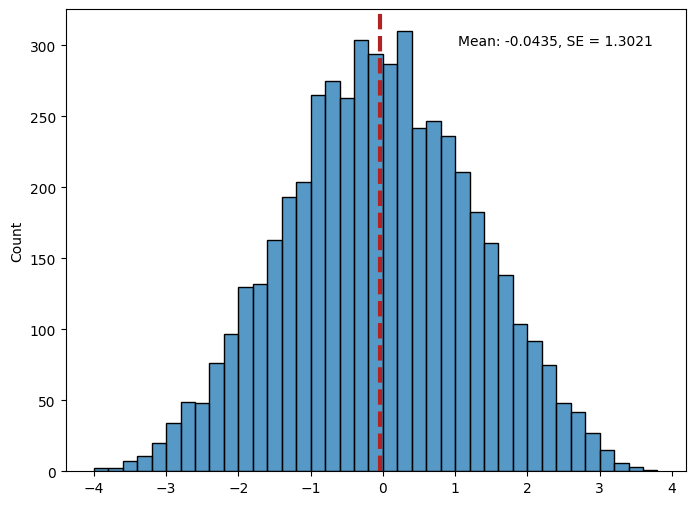

In [7]:
diffs, avg, se = get_randomization_dist(g1, g2, reallocate_groups, N_TRIALS, N_SAMPLES)
plot_hist(diffs, avg, se)

#### Using `random.shuffle`

In [8]:
def reallocate_groups_shuffling(g1: Iterable, g2: Iterable) -> tuple:
    combined = g1 + g2
    random.shuffle(combined)
    return combined[:len(g1)], combined[len(g1):]

<AxesSubplot: ylabel='Count'>

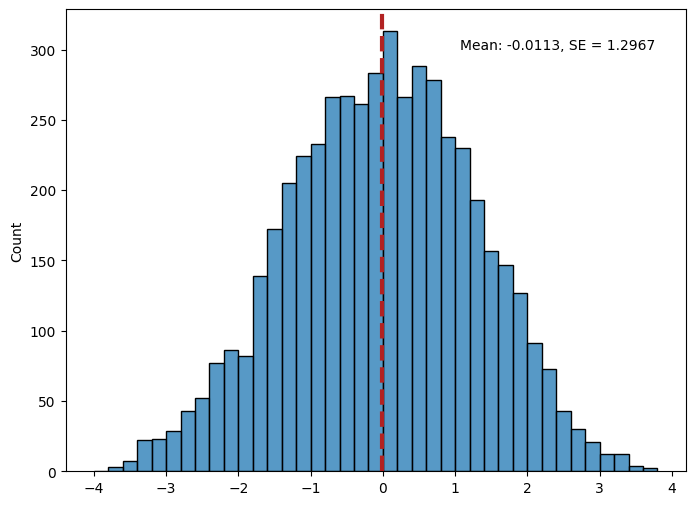

In [9]:
diffs, avg, se = get_randomization_dist(g1, g2, reallocate_groups_shuffling, N_TRIALS, N_SAMPLES)
plot_hist(diffs, avg, se)

## Shift Groups

In [10]:
def shift_groups(g1: Iterable, g2: Iterable) -> tuple:
    
    # Shift both groups so that the means are equal
    g1 = np.array(g1) - np.mean(g1)
    g2 = np.array(g2) - np.mean(g2)
    
    # Sample with replacement of same size
    g1 = random.choices(g1, k = len(g1))
    g2 = random.choices(g2, k = len(g2))

    return g1, g2

<AxesSubplot: ylabel='Count'>

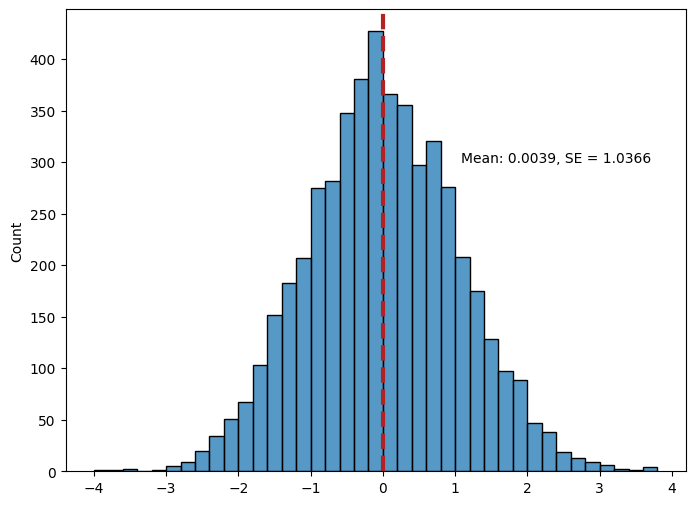

In [11]:
diffs, avg, se = get_randomization_dist(g1, g2, shift_groups, N_TRIALS, N_SAMPLES)
plot_hist(diffs, avg, se)

## Combine Groups

In [12]:
def combine_groups(g1: Iterable, g2: Iterable) -> tuple:
    pool = np.array(g1 + g2)
    g1 = random.choices(pool, k = len(g1))
    g2 = random.choices(pool, k = len(g2))

    return g1, g2

<AxesSubplot: ylabel='Count'>

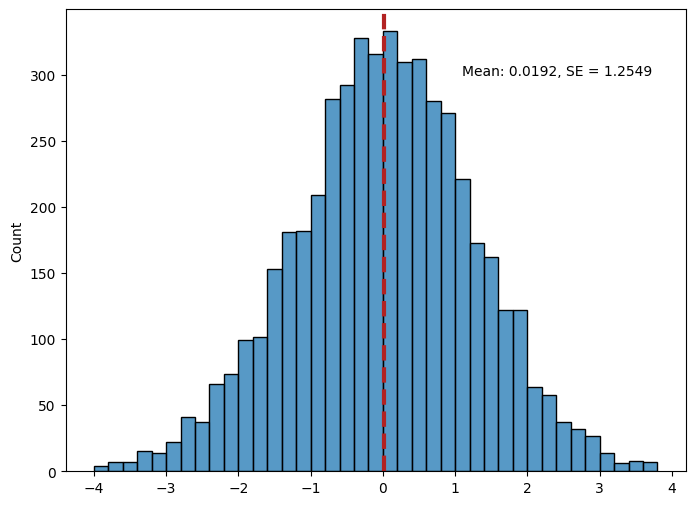

In [13]:
diffs, avg, se = get_randomization_dist(g1, g2, combine_groups, N_TRIALS, N_SAMPLES)
plot_hist(diffs, avg, se)